In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

# Build Height to Feet Length Regression

In [2]:
df = pd.read_csv('Height Dataset.csv')

In [3]:
df.head()

,Gender,Height (cm),Foot Length (cm)
0,Girls,165.0,21.0
1,Girls,168.0,18.0
2,Girls,155.0,27.0
3,Girls,163.0,23.0
4,Girls,170.0,30.0


In [4]:
df.shape

(864, 3)

In [5]:
df = df[df['Foot Length (cm)'] >= 22]

In [6]:
df.shape

(682, 3)

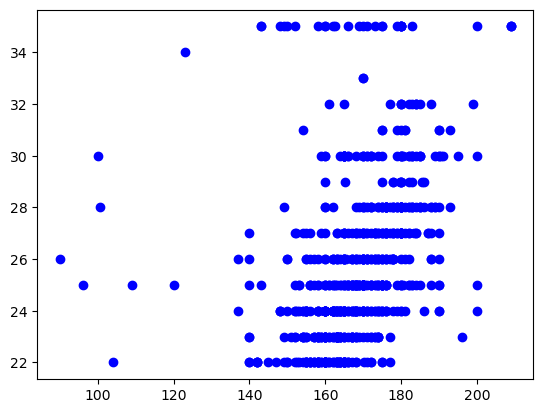

In [7]:
x_axis =df["Height (cm)"]
y_axis =df["Foot Length (cm)"]
plt.scatter(x_axis, y_axis, c ="blue")
 
# To show the plot
plt.show()

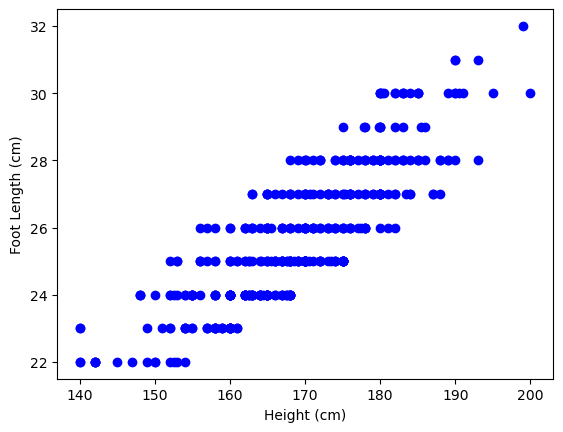

In [8]:


# Calculate the height-to-foot ratio for each data point
df["Height-to-Foot Ratio"] = df["Height (cm)"] / df["Foot Length (cm)"]

# Define the range for the acceptable ratio (6 to 7)
ratio_lower_limit = 6
ratio_upper_limit = 7

# Create a filter to select data points within the acceptable ratio range
filtered_df = df[(df["Height-to-Foot Ratio"] >= ratio_lower_limit) & (df["Height-to-Foot Ratio"] <= ratio_upper_limit)]

# Create a scatter plot for the filtered data
x_axis = filtered_df["Height (cm)"]
y_axis = filtered_df["Foot Length (cm)"]
plt.scatter(x_axis, y_axis, c="blue")

# Set labels for the axes
plt.xlabel("Height (cm)")
plt.ylabel("Foot Length (cm)")

# Show the plot
plt.show()

In [9]:
filtered_df.shape

(408, 4)

In [10]:
label_encoder = LabelEncoder()
filtered_df['Gender_Encoded'] = label_encoder.fit_transform(filtered_df['Gender'])


C:\Users\haoting\AppData\Local\Temp\ipykernel_26720\2360194869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Gender_Encoded'] = label_encoder.fit_transform(filtered_df['Gender'])


In [11]:
filtered_df.head()

,Gender,Height (cm),Foot Length (cm),Height-to-Foot Ratio,Gender_Encoded
6,Girls,165.0,26.0,6.346154,1
8,Girls,162.0,24.0,6.750000,1
9,Girls,155.0,23.0,6.739130,1
12,Girls,165.0,24.0,6.875000,1
13,Girls,150.0,22.0,6.818182,1


### Regression Model

In [12]:
# Separate the dataset into two based on 'Gender_Encoded'
data_male = filtered_df[filtered_df['Gender_Encoded'] == 0]
data_female = filtered_df[filtered_df['Gender_Encoded'] == 1]

### Define the independent variable (X) and the dependent variable (y) for both groups

In [13]:
X_male = data_male[['Height (cm)']]
y_male = data_male['Foot Length (cm)']

X_female = data_female[['Height (cm)']]
y_female = data_female['Foot Length (cm)']

In [14]:
# Split the data into training and testing sets for both groups
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, test_size=0.3, random_state=42)
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, test_size=0.3, random_state=42)

### Linear Regression Model

In [17]:
model_male = LinearRegression()
model_male.fit(X_male_train, y_male_train)

model_female = LinearRegression()
model_female.fit(X_female_train, y_female_train)

LinearRegression()

In [18]:
y_male_pred = model_male.predict(X_male_test)
y_female_pred = model_female.predict(X_female_test)

### Model Evaluation

In [19]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) for both groups
mse_male = mean_squared_error(y_male_test, y_male_pred)
r2_male = r2_score(y_male_test, y_male_pred)

mse_female = mean_squared_error(y_female_test, y_female_pred)
r2_female = r2_score(y_female_test, y_female_pred)


print(f"MALE")
print(f"Mean Squared Error (MSE): {mse_male:.2f}")
print(f"R-squared (R2) Score: {r2_male:.2f}")
print(f"")
print(f"FEMALE")
print(f"Mean Squared Error (MSE): {mse_female:.2f}")
print(f"R-squared (R2) Score: {r2_female:.2f}")

MALE
Mean Squared Error (MSE): 1.32
R-squared (R2) Score: 0.64

FEMALE
Mean Squared Error (MSE): 1.25
R-squared (R2) Score: 0.56


### Data Presentation

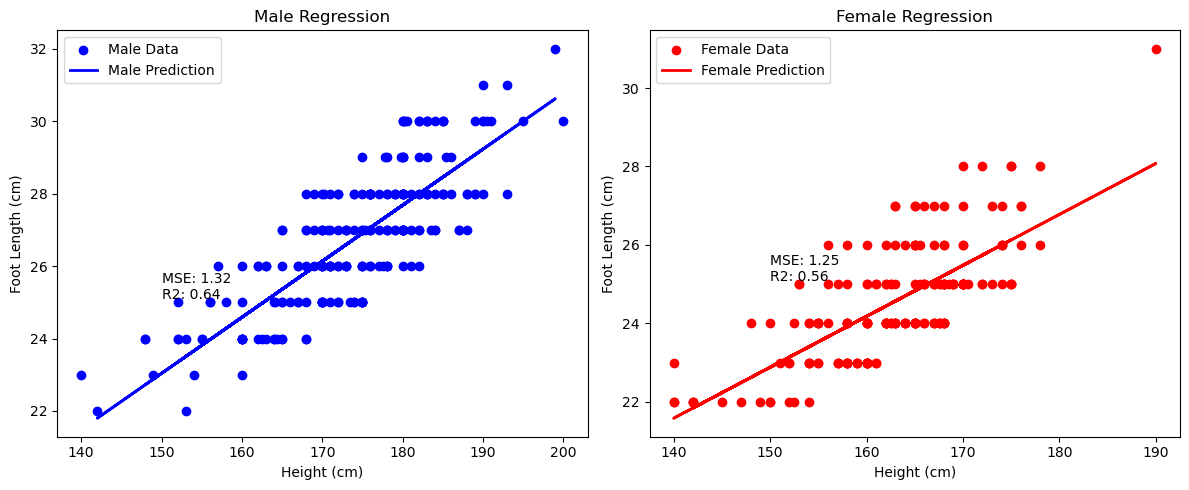

In [20]:
# Create separate plots for both groups
plt.figure(1, figsize=(12, 5))
plt.subplot(121)  # 1 row, 2 columns, plot 1
plt.scatter(X_male, y_male, color='blue', label='Male Data')
plt.plot(X_male_test, y_male_pred, color='blue', linewidth=2, label='Male Prediction')
plt.xlabel('Height (cm)')
plt.ylabel('Foot Length (cm)')
plt.title('Male Regression')
plt.text(150, 25, f'MSE: {mse_male:.2f}\nR2: {r2_male:.2f}', fontsize=10, verticalalignment='bottom')
plt.legend()

plt.subplot(122)  # 1 row, 2 columns, plot 2
plt.scatter(X_female, y_female, color='red', label='Female Data')
plt.plot(X_female_test, y_female_pred, color='red', linewidth=2, label='Female Prediction')
plt.xlabel('Height (cm)')
plt.ylabel('Foot Length (cm)')
plt.title('Female Regression')
plt.text(150, 25, f'MSE: {mse_female:.2f}\nR2: {r2_female:.2f}', fontsize=10, verticalalignment='bottom')
plt.legend()

plt.tight_layout()  # Ensures proper spacing

plt.show()

### Prediction Function

In [21]:

# Size charts for different brands and genders (as dictionaries)
adidas_sizes = {
    6: 24.2, 6.5: 24.6, 7: 25.0, 7.5: 25.5, 8: 25.9, 8.5: 26.3, 9: 26.7, 9.5: 27.1, 10: 27.6, 10.5: 28.0, 11: 28.4, 11.5: 28.8, 12: 29.3
}

nike_sizes = {
    6: 24.5, 6.5: 25.0, 7: 25.4, 7.5: 25.8, 8: 26.2, 8.5: 26.7, 9: 27.1, 9.5: 27.5, 10: 27.9, 10.5: 28.3, 11: 28.8, 11.5: 29.2, 12: 29.6
}

# Puma sizes for Men
puma_sizes = {
    6: 25.0, 6.5: 25.5, 7: 26.0, 7.5: 26.5, 8: 27.0, 8.5: 27.5, 9: 28.0, 9.5: 28.5, 10: 29.0, 10.5: 29.5, 11: 30.0, 11.5: 30.5, 12: 31.0
}

# Reebok sizes for Men
reebok_sizes = {
    6: 25, 6.5: 25.5, 7: 26.0, 7.5: 26.5, 8: 27, 8.5: 27.5, 9: 28, 9.5: 28.5, 10: 29, 10.5: 29.5, 11: 30, 11.5: 30.5, 12: 31
}

# New Balance sizes for Men
new_balance_sizes = {
    6: 24, 6.5: 24.5, 7: 25, 7.5: 25.5, 8: 26, 8.5: 26.5, 9: 27, 9.5: 27.5, 10: 28, 10.5: 28.5, 11: 29, 11.5: 29.5, 12: 30
}


In [22]:
def predict_foot_length(height, gender):
    if gender == "Male":
        predicted_foot_length = model_male.predict([[height]])  # Use the 'model_male' for male predictions
    else:
        predicted_foot_length = model_female.predict([[height]])  # Use the 'model_female' for female predictions
    return predicted_foot_length[0]  # Return the predicted foot length

In [24]:
# Function to get the size chart based on the brand
def get_size_chart(brand):
    if brand == "Nike":
        return nike_sizes
    elif brand == "Adidas":
        return adidas_sizes
    elif brand == "Reebok":
        return reebok_sizes
    elif brand == "Puma":
        return puma_sizes
    elif brand == "New Balance":
        return new_balance_sizes
    # Add other brand and gender conditions as needed


In [25]:
def predict_brand_size(height,gender,brand):
    predicted_length = predict_foot_length(height, gender)
    selected_size_chart = get_size_chart(brand)
    # Find the nearest size in the selected size chart
    nearest_size = min(selected_size_chart, key=lambda x: abs(selected_size_chart[x] - predicted_length))
    # The nearest recognized size based on the brand's size chart
    print(f"Predicted Feet Length:\t{predicted_length} cm ")
    print(f"Most Suitable Size in {brand}:\tUK {nearest_size} ")

In [27]:
predict_brand_size(165,"Female","Nike")

Predicted Feet Length:	24.829025244272714 cm 
Most Suitable Size in Nike:	UK 6.5 


D:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [58]:
# Save the trained models
with open('model_male.pkl', 'wb') as file:
    pickle.dump(model_male, file)

with open('model_female.pkl', 'wb') as file:
    pickle.dump(model_female, file)